In [1]:
install.packages("GGally")
library(tidyverse)
library(tidymodels)
library(patchwork)
library(GGally)
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

## Title 

### Chest Pain Classification Using KNN

## Introduction 

### Background Information:
Heart disease refers to a range of conditions that affect the heart. Various factors, such as age, lifestyle, and genetics, can influence the chances of an individual getting heart disease. We want to understand what factors are related to certain chest pain types.

The KNN algorithim works as follows, based on the K (this can be any number eg: 1,2,3) nearest neighbors, we will take the classification of them and say this observation is of that classification. We use proximity to make classifications or predictions about the grouping of an individual data point.

Example: If a certain observation has an unknown classification and it's K nearest neighbors are all of type "Burger" then this observation will be of type burger!

### The Question:
Can we determine what type of chest pain a patient is likely experiencing based on only their age and cholesterol levels?

### Dataset:
The dataset that we will be using is titled “Heart Disease”.  It contains observations from various locations published as 4 experiment databases, each including the same subset of 14 attributes. For ease of reading, we chose to use the processed experiment files for our data.


## Methods & Results

### Pre Analysis:

To read the data, we first downloaded the data set. We then looked through the files and realized that only the processed data was likely to be readable with our current knowledge, and thus chose to use the 4 processed files.
<br>

After reading the files and looking through the heart-disease.names file for the descriptions of each attribute, we gave the table columns appropriate names to ensure the data would be understandable.
Below is the original data with added column names:

In [2]:
hungarian_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.hungarian.data", delim = ",", col_names = FALSE)
colnames(hungarian_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

cleveland_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.cleveland.data", delim = ",", col_names = FALSE)
colnames(cleveland_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

switzerland_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.switzerland.data", delim = ",", col_names = FALSE)
colnames(switzerland_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

va_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.va.data", delim = ",", col_names = FALSE)
colnames(va_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

stacked_data <- rbind(hungarian_data, va_data, switzerland_data, cleveland_data)
head(stacked_data)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

age,sex,chest_pain_type,rest_bp,serum_cholesterol,fasting_bs,rest_ecg_results,max_heartrate,exercise_angina,st_depression,slope_type,num_coloured_flourosopy,thal,diagnosis
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0


After giving the data the correct columns, we stacked the data together to make the analyzation process easier. The next step in tidying the data was to give values within each observation the appropriate category, and to remove all NA values.

In [3]:
editedData <- stacked_data

idx <- editedData == "?"
# replace "?" values with NA
is.na(editedData) <- idx

navalues <- colSums(is.na(editedData))
navalues

age                     sex         chest_pain_type 
                      0                       0                       0 
                rest_bp       serum_cholesterol              fasting_bs 
                     59                      30                      90 
       rest_ecg_results           max_heartrate         exercise_angina 
                      2                      55                      55 
          st_depression              slope_type num_coloured_flourosopy 
                     62                     309                     611 
                   thal               diagnosis 
                    486                       0

In [4]:
#Removing columns with too many NA values and then removing observations with NA
editedData <- editedData |>
    # select(-slope_type, -num_coloured_flourosopy, -thal) |>
    na.omit()

In [5]:
editedData <- stacked_data

idx <- editedData == "?"
# replace "?" values with NA
is.na(editedData) <- idx

navalues <- colSums(is.na(editedData))
navalues

#Removing columns with too many NA values and then removing observations with NA
editedData <- editedData |>
    select(-slope_type, -num_coloured_flourosopy, -thal) |>
    na.omit()
for(i in 1:nrow(editedData)) {       # for-loop over rows
    if(editedData$sex[i] == 1){
      editedData$sex[i] <- "Male"
    }else{
      editedData$sex[i]<- "Female"
      }
    
    if(editedData$chest_pain_type[i] == 1){
      editedData$chest_pain_type[i] <- "Typical Angina"
    }

    if(editedData$chest_pain_type[i] == 2){
      editedData$chest_pain_type[i] <- "Atypical Angina"
    }

    if(editedData$chest_pain_type[i] == 3){
      editedData$chest_pain_type[i] <- "Non-Anginal Pain"
    }

    if(editedData$chest_pain_type[i] == 4){
      editedData$chest_pain_type[i] <- "Asymptomatic"
    }

   if(editedData$diagnosis[i] == 0){
     editedData$diagnosis[i] <- "< 50% Diameter Narrowing"
   }else{
     editedData$diagnosis[i] <- "> 50% Diameter Narrowing"
   }  

    if(!is.na(editedData$rest_ecg_results[i])){
       if(editedData$rest_ecg_results[i] == 0){
          editedData$rest_ecg_results[i] <- "Normal"
             }
    
        if(editedData$rest_ecg_results[i] == 1){
          editedData$rest_ecg_results[i] <- "ST-T Wave Abnormality"
             }
    
         if(editedData$rest_ecg_results[i] == 2){
          editedData$rest_ecg_results[i] <- "Probable or Definite Left Ventricular Hypertrophy"
             }
        
        }

 if(!is.na(editedData$fasting_bs[i])){

    if(editedData$fasting_bs[i] == 0){
          editedData$fasting_bs[i] <- "False"
             }
    
    if(editedData$fasting_bs[i] == 1){
          editedData$fasting_bs[i] <- "True"
             }
     }

    
     if(!is.na(editedData$exercise_angina[i])){
        if(editedData$exercise_angina[i] == 0){
              editedData$exercise_angina[i] <- "No"
                 }
        
        if(editedData$exercise_angina[i] == 1){
              editedData$exercise_angina[i] <- "Yes"
                 }
         }

}
#Removing incorrect 0 values
 editedData <- editedData |>
    filter(age != 0) |>
    filter(rest_bp != 0) |>
    filter(serum_cholesterol != 0) |>
    filter(max_heartrate != 0)
#Changing data types
editedData <- editedData |>
    mutate(sex = as.factor(sex)) |>
    mutate(chest_pain_type = as.factor(chest_pain_type)) |>
    mutate(rest_bp = as.numeric(rest_bp)) |>
    mutate(serum_cholesterol = as.numeric(serum_cholesterol)) |>
    mutate(fasting_bs = as.factor(fasting_bs)) |>
    mutate(rest_ecg_results = as.factor(rest_ecg_results)) |>
    mutate(max_heartrate = as.numeric(max_heartrate)) |>
    mutate(exercise_angina = as.factor(exercise_angina)) |>
    mutate(st_depression = as.numeric(st_depression)) |>
    mutate(diagnosis = as.factor(diagnosis))
head(editedData)

age                     sex         chest_pain_type 
                      0                       0                       0 
                rest_bp       serum_cholesterol              fasting_bs 
                     59                      30                      90 
       rest_ecg_results           max_heartrate         exercise_angina 
                      2                      55                      55 
          st_depression              slope_type num_coloured_flourosopy 
                     62                     309                     611 
                   thal               diagnosis 
                    486                       0

age,sex,chest_pain_type,rest_bp,serum_cholesterol,fasting_bs,rest_ecg_results,max_heartrate,exercise_angina,st_depression,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
28,Male,Atypical Angina,130,132,False,Probable or Definite Left Ventricular Hypertrophy,185,No,0,< 50% Diameter Narrowing
29,Male,Atypical Angina,120,243,False,Normal,160,No,0,< 50% Diameter Narrowing
30,Female,Typical Angina,170,237,False,ST-T Wave Abnormality,170,No,0,< 50% Diameter Narrowing
31,Female,Atypical Angina,100,219,False,ST-T Wave Abnormality,150,No,0,< 50% Diameter Narrowing
32,Female,Atypical Angina,105,198,False,Normal,165,No,0,< 50% Diameter Narrowing
32,Male,Atypical Angina,110,225,False,Normal,184,No,0,< 50% Diameter Narrowing


We chose to leave the diagnosis values as numbers, as the dataset's description files did not give any distinction between different non-zero values.

In [6]:
#Removing incorrect 0 values
editedData <- editedData |>
    filter(age != 0) |>
    filter(rest_bp != 0) |>
    filter(serum_cholesterol != 0) |>
    filter(max_heartrate != 0)

In [7]:
#Changing data types
editedData <- editedData |>
    mutate(sex = as.factor(sex)) |>
    mutate(chest_pain_type = as.factor(chest_pain_type)) |>
    mutate(rest_bp = as.numeric(rest_bp)) |>
    mutate(fasting_bs = as.factor(fasting_bs)) |>
    mutate(rest_ecg_results = as.factor(rest_ecg_results)) |>
    mutate(max_heartrate = as.numeric(max_heartrate)) |>
    mutate(exercise_angina = as.factor(exercise_angina)) |>
    mutate(st_depression = as.numeric(st_depression)) |>
    mutate(diagnosis = as.factor(diagnosis))

After these methods, we are left with this data!

Here is a sample of our data below which also marks the end of our tidying.

In [8]:
head(editedData)

age,sex,chest_pain_type,rest_bp,serum_cholesterol,fasting_bs,rest_ecg_results,max_heartrate,exercise_angina,st_depression,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
28,Male,Atypical Angina,130,132,False,Probable or Definite Left Ventricular Hypertrophy,185,No,0,< 50% Diameter Narrowing
29,Male,Atypical Angina,120,243,False,Normal,160,No,0,< 50% Diameter Narrowing
30,Female,Typical Angina,170,237,False,ST-T Wave Abnormality,170,No,0,< 50% Diameter Narrowing
31,Female,Atypical Angina,100,219,False,ST-T Wave Abnormality,150,No,0,< 50% Diameter Narrowing
32,Female,Atypical Angina,105,198,False,Normal,165,No,0,< 50% Diameter Narrowing
32,Male,Atypical Angina,110,225,False,Normal,184,No,0,< 50% Diameter Narrowing


### Analysis Methods:

In our analysis, we will use cholesterol, resting blood pressure, max heart rate, ST-depression, exercise angina, and diagnosis as our predictors. We chose many predictors as our preliminary visualizations did not indicate a particularly strong correlation between any of the individual predictors and chest pain type, and thus must use a large range of predictors which may allow the classifier to narrow down what category of chest pain to assign to a new observation. We eliminated sex, blood sugar, and ECG measurements as they seemed to distribute very similarly across all pain types. 
<br>

For our final visualization, we plan on creating a scatterplot matrix showing how each variable relates to another. The shape and colour of each point will correspond to its chest pain type, and we can visualize new observations across the multiple grids to see if our predictors do a good job of evaluating the likely class of the new observation. 

### Implementation Of Analysis Methods:

In [17]:
set.seed(100)

data_split <- initial_split(editedData, prop = 0.75, strata = chest_pain_type)
data_train <- training(data_split)
data_test <- testing(data_split) 

In [18]:
set.seed(100)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_recipe <- recipe(chest_pain_type ~ age + rest_bp + serum_cholesterol + fasting_bs + rest_ecg_results + max_heartrate + exercise_angina + st_depression + diagnosis,
                       data = data_train) |>
    step_scale(age, serum_cholesterol, rest_bp, max_heartrate, st_depression) |>
    step_center(age, serum_cholesterol, rest_bp, max_heartrate, st_depression)

heart_refold <- vfold_cv(data_train, v = 5, strata = chest_pain_type)

Sex has been left out of the predictors as analysis during the proposal stage showed that it was not useful for differentiating between chest pain types. We have chosen to do a 5-fold cross-validation on our data, as higher fold values resulted in some splits having missing classes (i.e. only 3 out of 4) for chest_pain_type.

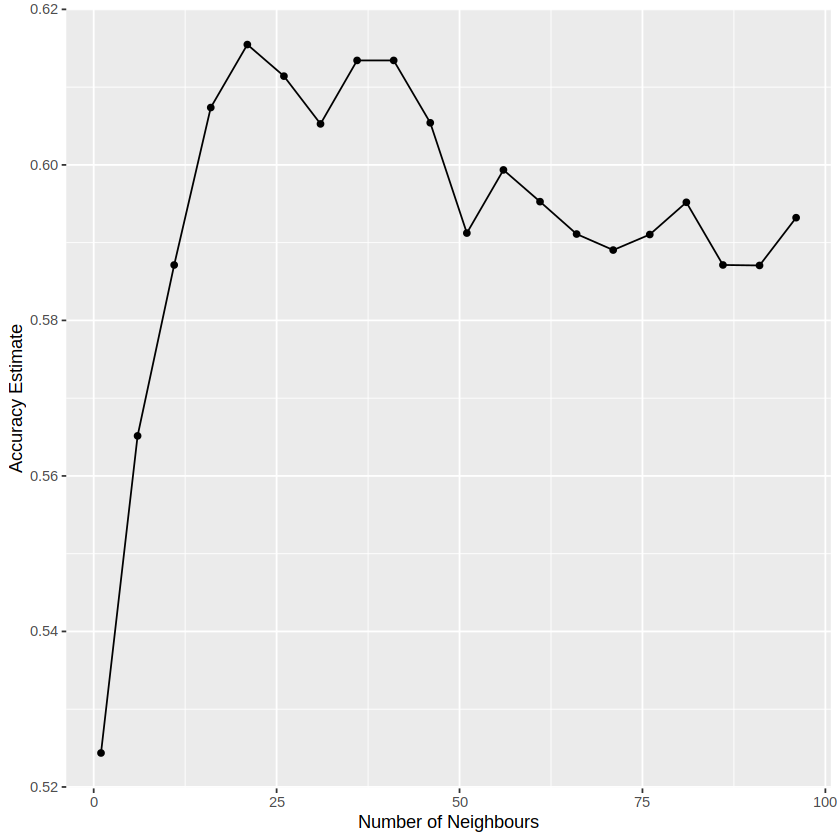

In [19]:
k_vals_wide <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

resample_results_wide <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = heart_refold, grid = k_vals_wide) |>
    collect_metrics()

cross_val_plot_wide <- resample_results_wide |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbours", y = "Accuracy Estimate")

cross_val_plot_wide

We first plotted accuracy against a wide range of neighbor values to see which range we should look into to find the optimal neighbor count. From this chart, we decided to look more closely at the range of 15-35 neighbors.

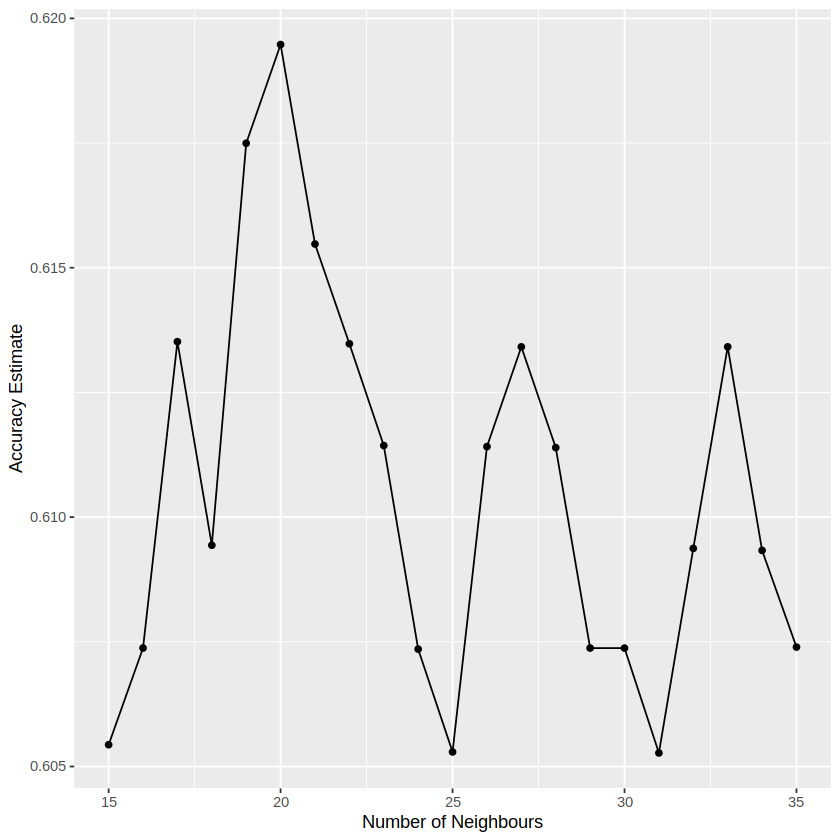

In [20]:
set.seed(100)

k_vals <- tibble(neighbors = seq(from = 15, to = 35, by = 1))

resample_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = heart_refold, grid = k_vals) |>
    collect_metrics()

optimal_neighbors <- resample_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)

cross_val_plot <- resample_results |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbours", y = "Accuracy Estimate")
cross_val_plot

In [21]:
optimal_neighbors

[1] 20

The highest accuracy value for neighbors was when n = 22. We decided to go with this value as it matched the 3 criteria for selecting a good K value:
- High accuracy (relatively speaking)
- High accuracy neighbors
- Not too computationally expensive

In [22]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = optimal_neighbors) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    fit(data_train)

pain_predictions <- predict(heart_fit, data_test) |>
    bind_cols(data_test)
pain_prediction_accuracy <- pain_predictions |>
    metrics(truth = chest_pain_type, estimate = .pred_class)
pain_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5868263
kap,multiclass,0.3430070


In [23]:
pain_matrix <- pain_predictions |>
    conf_mat(truth = chest_pain_type, estimate = .pred_class)
pain_matrix

                  Truth
Prediction         Asymptomatic Atypical Angina Non-Anginal Pain Typical Angina
  Asymptomatic               66               8               12              4
  Atypical Angina            13              24               17              5
  Non-Anginal Pain            5               4                8              1
  Typical Angina              0               0                0              0

The accuracy of our model is about 57.5% when run on the testing data. Given that there are 4 classes, the accuracy for random guessing would be around 25%, meaning the predictors we have trained our model on are definitely correlated in some way to each of the chest pain types. However, an accuracy of little over 57.5% is still far from ideal, and if we wanted to implement this model in a real world scenario, we would likely need to give it more predictors or use a more advanced method of modeling than k-nearest neighbors. From the confusion matrix, it is notable that the least accurate prediction class by far is for Non-Anginal Pain, which is when the patient has chest pain not caused by heart disease. However, we are not exactly sure about the implications of this finding, as we do not know how important false positives or negatives are for these different chest pain types.

### Visualization Of Analysis:

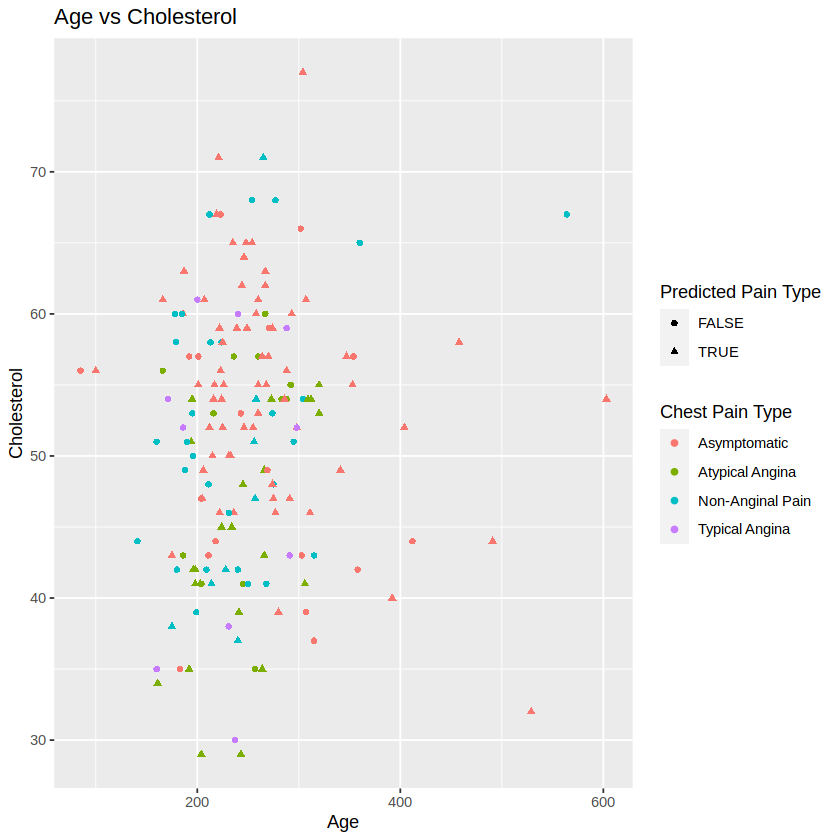

In [25]:
pain_predictions <- pain_predictions |> mutate(true = chest_pain_type == .pred_class)

plotagechlo <- pain_predictions |> ggplot(aes(x = serum_cholesterol, y = age, color = chest_pain_type, shape = true)) + geom_point() + labs(x = "Age", y = "Cholesterol", color = "Chest Pain Type", shape = "Predicted Pain Type", title = "Age vs Cholesterol") 

plotagechlo

In the graph above, we are trying to see if the predicted type matches the actual type. The goal of this graph is to show our trained model and test it against our real data.

We chose to use Cholesterol and Age since these are the most common causes predictors of heart disease as noted by Risk Factors for Coronary Artery Disease: Historical Perspectives which led us to choose these two quantitative data columns for our plot.

Right now we know that the accuracy of our trained data is around 57% which is why our False and True shapes are of similar count.

## Discussion

### What We Found:

We found that with our analysis, our accuracy is around 57% which is not very profound but it proves to be better than randomly guessing what a possible observation means.

### Is This What We Expected:

### Impact Of Findings:

### Future Questions:

## References

1. [Heart Disease and Stroke](https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.), Centers for Disease Control and Prevention, September, 2022 

2. [Risk Factors for Coronary Artery Disease: Historical Perspectives](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5686931/), Rachel Hajar, July, 2017 